In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time

Using TensorFlow backend.
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/t

In [2]:
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, 'Emotion Dataset/train')
validation_dir = os.path.join(current_dir, 'Emotion Dataset/validation')

train_datasets = os.listdir(train_dir)
validation_datasets = os.listdir(validation_dir)

In [3]:
train_dataset_count = 0
for i in train_datasets:
    data_path = os.path.join(train_dir, str(i))
    train_dataset_count += len(os.listdir(data_path))   
print('Train datasets: ',train_dataset_count)

validation_dataset_count = 0
for i in validation_datasets:
    data_path = os.path.join(validation_dir, str(i))
    validation_dataset_count += len(os.listdir(data_path))   
print('Validation datasets: ', validation_dataset_count)

Train datasets:  28709
Validation datasets:  3589


In [4]:
batch_size = 32
img_rows, img_cols = 32, 32
epochs = 100

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  shear_range=0.3,
                                  horizontal_flip=True,
                                  zoom_range=0.3)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(train_datasets), kernel_initializer='he_normal', activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
checkpoint = ModelCheckpoint('facial_emotion_recognition.h5',
                            monitor='val_accuracy',
                            mode='max',
                            save_best_only=True,
                            verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=15,
                              verbose=1,
                              mode='max',
                              restore_best_weights=True)

callbacks = [checkpoint, early_stopping]

In [8]:
model.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
time1 = time.time()
history = model.fit_generator(train_generator,
                             validation_data=validation_generator,
                             epochs=epochs,
                             steps_per_epoch=train_dataset_count//batch_size,
                             validation_steps=validation_dataset_count//batch_size,
                             callbacks=callbacks)
time2 = time.time()

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
897/897 [==============================] - 225s 250ms/step - loss: 2.0985 - accuracy: 0.1975 - val_loss: 1.7886 - val_accuracy: 0.2500

Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to facial_emotion_recognition.h5
Epoch 2/100
897/897 [==============================] - 227s 254ms/step - loss: 1.8132 - accuracy: 0.2450 - val_loss: 1.8129 - val_accuracy: 0.2525

Epoch 00002: val_accuracy improved from 0.25000 to 0.25246, saving model to facial_emotion_recognition.h5
Epoch 3/100
897/897 [==============================] - 229s 256ms/step - loss: 1.7898 - accuracy: 0.2570 - val_loss: 1.8757 - val_accuracy: 0.2572

Epoch 00003: val_accuracy improved from 0.25246 to 0.25724, saving model to facial_emotion_recognition.h5
Epoch 4/100
897/897 [==============================] - 230s 256ms/step - loss: 1.7723 - accuracy: 0.2679 - val_loss: 1.6417 - val_accuracy: 0.3180

Epoch 00004: val_accuracy improved from 0.257

897/897 [==============================] - 235s 262ms/step - loss: 1.3521 - accuracy: 0.4903 - val_loss: 1.5248 - val_accuracy: 0.4627

Epoch 00036: val_accuracy did not improve from 0.48468
Epoch 37/100
897/897 [==============================] - 243s 271ms/step - loss: 1.3473 - accuracy: 0.4931 - val_loss: 1.4956 - val_accuracy: 0.4774

Epoch 00037: val_accuracy did not improve from 0.48468
Epoch 38/100
897/897 [==============================] - 258s 287ms/step - loss: 1.3494 - accuracy: 0.4934 - val_loss: 1.0910 - val_accuracy: 0.4985

Epoch 00038: val_accuracy improved from 0.48468 to 0.49845, saving model to facial_emotion_recognition.h5
Epoch 39/100
897/897 [==============================] - 243s 270ms/step - loss: 1.3458 - accuracy: 0.4958 - val_loss: 1.4072 - val_accuracy: 0.4698

Epoch 00039: val_accuracy did not improve from 0.49845
Epoch 40/100
897/897 [==============================] - 240s 267ms/step - loss: 1.3377 - accuracy: 0.4972 - val_loss: 1.6326 - val_accuracy: 0.477

In [10]:
print(f'{(time2 - time1)/60} mins')

277.41478083531064 mins


In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

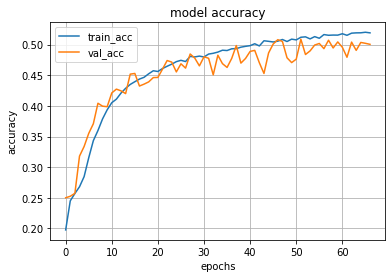

In [12]:
#Accuracy plotting
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()

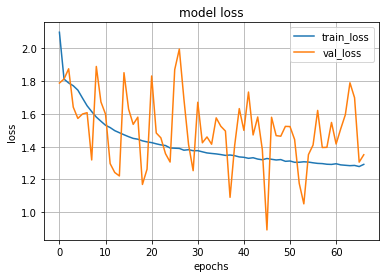

In [13]:
#Loss plotting
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()